# Unemployment Analysis

## Understanding The Problem

#### Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project.

## Importing Modules

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Analysing Unemployment Before COVID-19

### Data Extraction

In [5]:
before_covid = pd.read_csv("Unemployment in India.csv")
before_covid.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


### Data Cleaning

In [7]:
before_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [9]:
before_covid.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [10]:
before_covid = before_covid.dropna()

In [11]:
before_covid.to_csv("Unemployment in India.csv", index=False)

In [12]:
before_covid.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [13]:
before_covid.duplicated().sum()

0

In [14]:
print("No. of Row is : ", before_covid.shape[0])
print("No. of Column is : ", before_covid.shape[1])

No. of Row is :  740
No. of Column is :  7


In [15]:
before_covid.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [16]:
before_covid = before_covid.rename(columns = {before_covid.columns[0]:'State', before_covid.columns[3]:'EUR', before_covid.columns[4]:
                        'EE', before_covid.columns[5]:'ELPR', before_covid.columns[6]:'Area'})

before_covid.head()
     

,State,Date,Frequency,EUR,EE,ELPR,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


### Exploratory Data Analysis

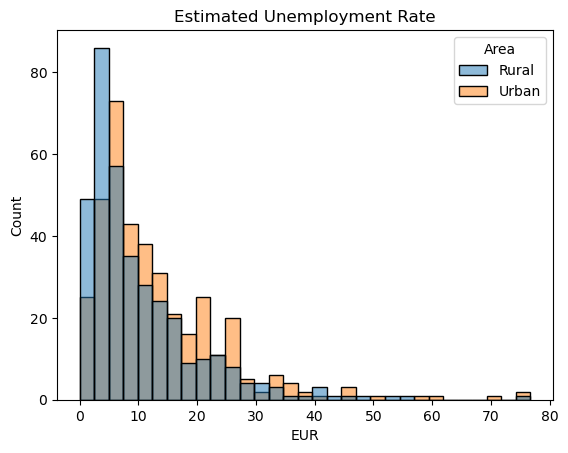

In [18]:
plt.title("Estimated Unemployment Rate")
sns.histplot(x = "EUR", hue = "Area", data = before_covid)
plt.show()

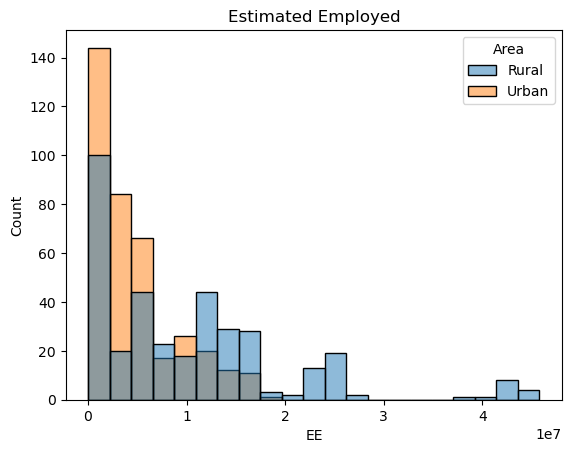

In [19]:
plt.title("Estimated Employed")
sns.histplot(x = "EE", hue = "Area", data = before_covid)
plt.show()

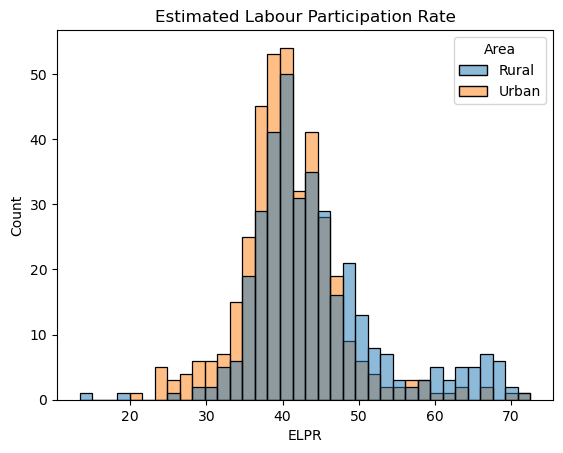

In [20]:
plt.title("Estimated Labour Participation Rate")
sns.histplot(x = "ELPR", hue = "Area", data = before_covid)
plt.show()

In [21]:
region_stats = before_covid.groupby(['Area'])[['EUR', 'EE', 'ELPR']].mean().reset_index()
region_stats.head()

,Area,EUR,EE,ELPR
0,Rural,10.324791,1.019285e+07,44.464819
1,Urban,13.166614,4.388626e+06,40.901365


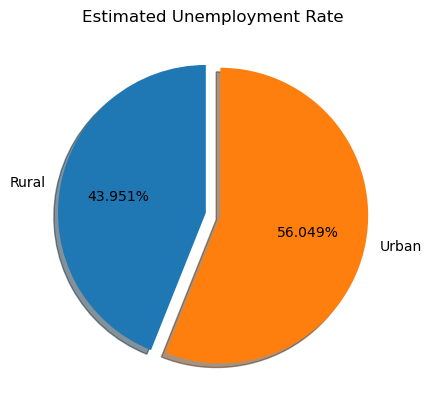

In [22]:
plt.title('Estimated Unemployment Rate')
plt.pie(region_stats['EUR'], labels = region_stats['Area'], autopct = '%0.3f%%', explode = [0.05,0.05], startangle = 90, shadow = True)
plt.show() 

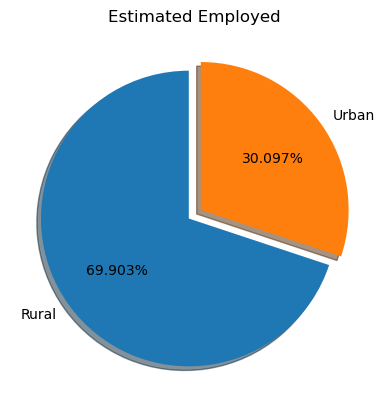

In [23]:
plt.title('Estimated Employed')
plt.pie(region_stats['EE'], labels = region_stats['Area'], autopct = '%0.3f%%', explode = [0.05, 0.05], startangle = 90, shadow = True)
plt.show() 

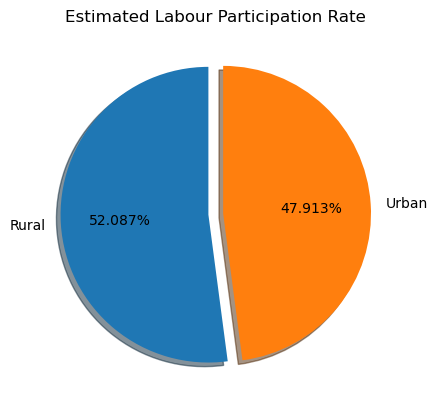

In [24]:
plt.title('Estimated Labour Participation Rate')
plt.pie(region_stats['ELPR'], labels = region_stats['Area'], autopct = '%0.3f%%', explode = [0.05, 0.05], startangle = 90, shadow = True)
plt.show() 

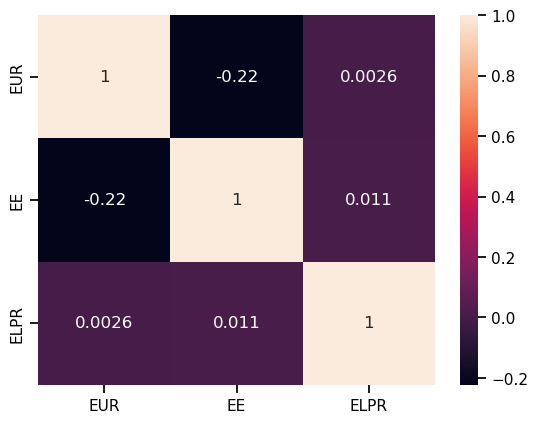

In [25]:
heat_maps = before_covid[['EUR', 'EE', 'ELPR']]
sns.set_context('notebook', font_scale = 1)
sns.heatmap(heat_maps.corr(), annot = True);

## Analysing Unemployment After COVID-19

### Data Extraction

In [27]:
after_covid = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
after_covid.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


### Data Cleaning

In [29]:
after_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [30]:
after_covid.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [31]:
after_covid.duplicated().sum()

0

In [32]:
print("No. of Row is : ", after_covid.shape[0])
print("No. of Column is : ", after_covid.shape[1])

No. of Row is :  267
No. of Column is :  9


In [33]:
af_covid = after_covid.rename(columns = {after_covid.columns[0]:'State', after_covid.columns[3]:'EUR', after_covid.columns[4]:
                        'EE', after_covid.columns[5]:'ELPR', after_covid.columns[6]:'Area'})
af_covid.head()

,State,Date,Frequency,EUR,EE,ELPR,Area,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [34]:
af_covid['Area'].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [35]:
df = af_covid.groupby(['Area'])[['EUR', 'EE', 'ELPR']].mean().reset_index()
df.head()

,Area,EUR,EE,ELPR
0,East,13.916000,1.960237e+07,40.108750
1,North,15.889620,1.307249e+07,38.702658
2,Northeast,10.950263,3.617106e+06,52.055263
3,South,10.454667,1.404059e+07,40.436167
4,West,8.239000,1.862351e+07,41.257000


In [36]:
df.describe()

,EUR,EE,ELPR
count,5.000000,5.000000e+00,5.000000
mean,11.889910,1.379121e+07,42.511968
std,3.015573,6.348461e+06,5.413979
min,8.239000,3.617106e+06,38.702658
25%,10.454667,1.307249e+07,40.108750
50%,10.950263,1.404059e+07,40.436167
75%,13.916000,1.862351e+07,41.257000
max,15.889620,1.960237e+07,52.055263


### Exploratory Data Analysis

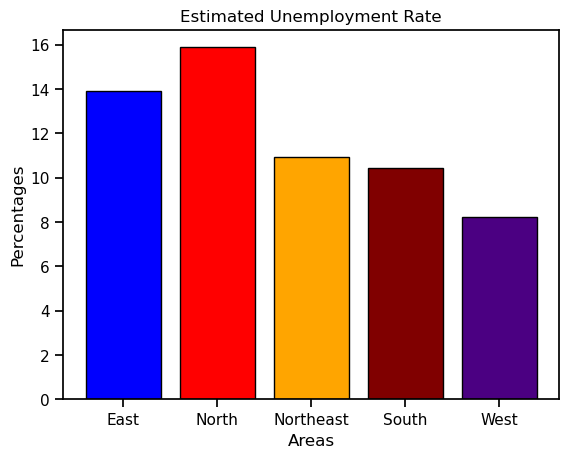

In [38]:
colors = ['blue', 'red', 'orange', 'maroon', 'indigo']
plt.bar(df['Area'].values, list(df['EUR'].values), color = colors, edgecolor = 'black')
plt.title("Estimated Unemployment Rate")
plt.xlabel('Areas')
plt.ylabel('Percentages')
plt.show()

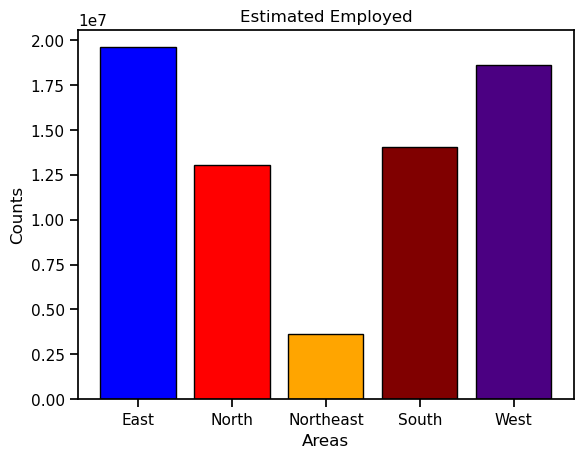

In [39]:
colors = ['blue', 'red', 'orange', 'maroon', 'indigo']
plt.bar(df['Area'].values, list(df['EE'].values), color = colors, edgecolor = 'black')
plt.title("Estimated Employed")
plt.xlabel('Areas')
plt.ylabel('Counts')
plt.show()

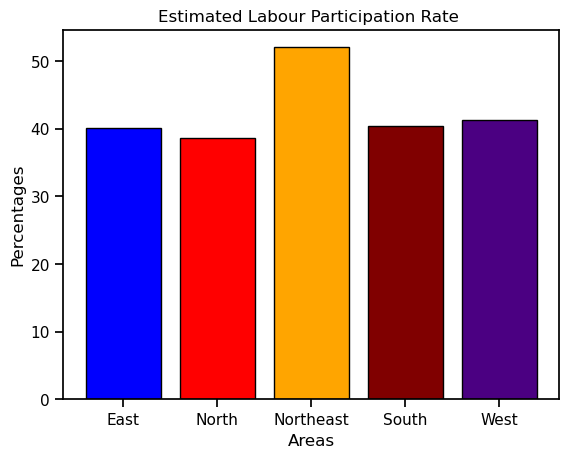

In [40]:
colors = ['blue', 'red', 'orange', 'maroon', 'indigo']
plt.bar(df['Area'].values, list(df['ELPR'].values), color = colors, edgecolor = 'black')
plt.title("Estimated Labour Participation Rate ")
plt.xlabel('Areas')
plt.ylabel('Percentages')
plt.show()

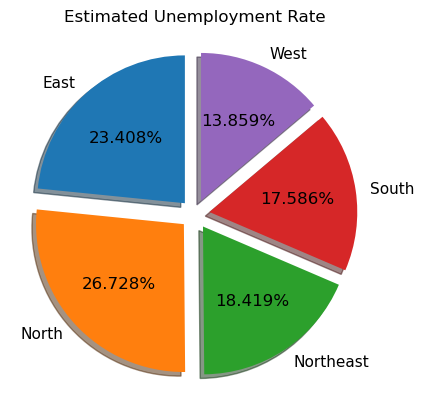

In [41]:
plt.title('Estimated Unemployment Rate')
plt.pie(df['EUR'], labels = df['Area'], autopct = '%0.3f%%', explode = [0.1,0.1,0.1,0.1,0.1], startangle = 90, shadow = True)
plt.show() 

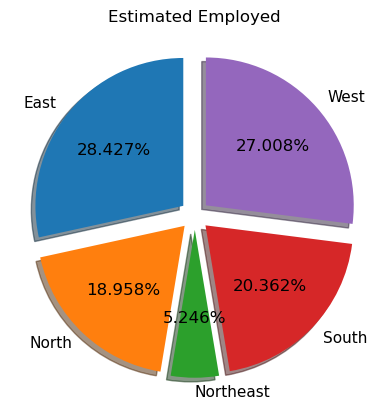

In [42]:
plt.title('Estimated Employed')
plt.pie(df['EE'], labels = df['Area'], autopct = '%0.3f%%', explode = [0.1,0.1,0.1,0.1,0.1], startangle = 90, shadow = True)
plt.show() 

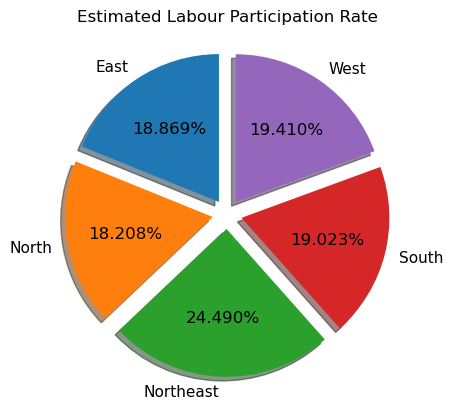

In [43]:
plt.title('Estimated Labour Participation Rate')
plt.pie(df['ELPR'], labels = df['Area'], autopct = '%0.3f%%', explode = [0.1,0.1,0.1,0.1,0.1], startangle = 90, shadow = True)
plt.show() 

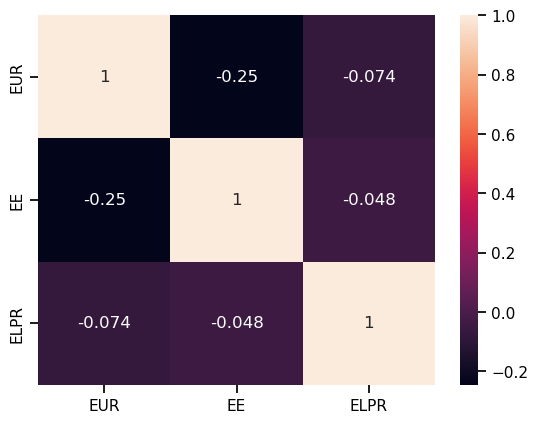

In [44]:
heat_maps1 = af_covid[['EUR', 'EE', 'ELPR']]
sns.set_context('notebook', font_scale = 1)
sns.heatmap(heat_maps1.corr(), annot = True);

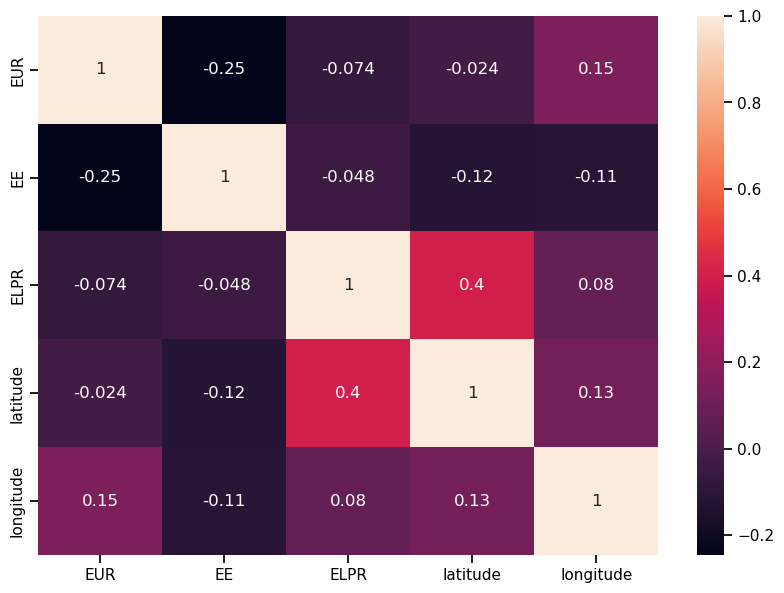

In [45]:
plt.figure(figsize = (10, 7))
heat_maps1 = af_covid[['EUR', 'EE', 'ELPR','latitude', 'longitude']]
sns.set_context('notebook', font_scale = 1)
sns.heatmap(heat_maps1.corr(), annot = True);

## Before Covid v/s After Covid

### Data Cleaning

In [48]:
before_covid.head()

,State,Date,Frequency,EUR,EE,ELPR,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [49]:
af_covid.head()

,State,Date,Frequency,EUR,EE,ELPR,Area,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [50]:
bfr_covid = [before_covid['EUR'].mean(), before_covid['EE'].mean(), before_covid['ELPR'].mean()]
bfr_covid

[11.787945945945946, 7204460.025675676, 42.630121621621626]

In [51]:
afr_covid = [af_covid['EUR'].mean(), af_covid['EE'].mean(), af_covid['ELPR'].mean()]
afr_covid

[12.236928838951311, 13962105.722846443, 41.68157303370787]

### Formation of Estimated Unemployment Rate

In [53]:
EUR_dict = dict(zip(['Before Covid', 'After Covid'], [bfr_covid[0], afr_covid[0]]))
EUR_dict

{'Before Covid': 11.787945945945946, 'After Covid': 12.236928838951311}

In [54]:
EUR_df = pd.DataFrame(EUR_dict.items(), columns = ['Estimated Unemployment Rate', 'Percentages'])
EUR_df

,Estimated Unemployment Rate,Percentages
0,Before Covid,11.787946
1,After Covid,12.236929


### Exploratory Data Analysis

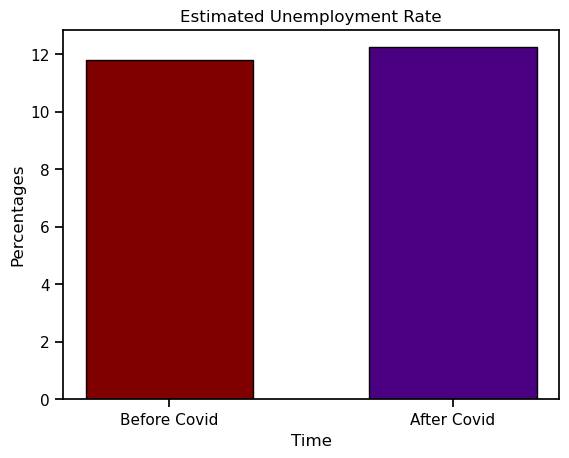

In [55]:
plt.bar(EUR_df['Estimated Unemployment Rate'].values, list(EUR_df['Percentages'].values),color = ['maroon', 'indigo'], edgecolor = 'black', width = 0.59)
plt.title("Estimated Unemployment Rate")
plt.xlabel('Time')
plt.ylabel('Percentages')
plt.show()

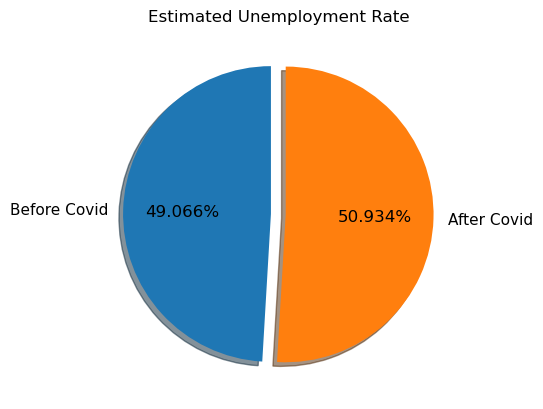

In [56]:
plt.title('Estimated Unemployment Rate')
plt.pie(EUR_df['Percentages'].values, labels = EUR_df['Estimated Unemployment Rate'], autopct = '%0.3f%%', explode = [0.05, 0.05], startangle = 90, shadow = True)
plt.show() 

### Formation of Estimated Employed

In [58]:
EE_dict = dict(zip(['Before Covid', 'After Covid'], [bfr_covid[1], afr_covid[1]]))
EE_dict

{'Before Covid': 7204460.025675676, 'After Covid': 13962105.722846443}

In [59]:
EE_df = pd.DataFrame(EE_dict.items(), columns = ['Estimated Employed', 'Counts'])
EE_df

,Estimated Employed,Counts
0,Before Covid,7.204460e+06
1,After Covid,1.396211e+07


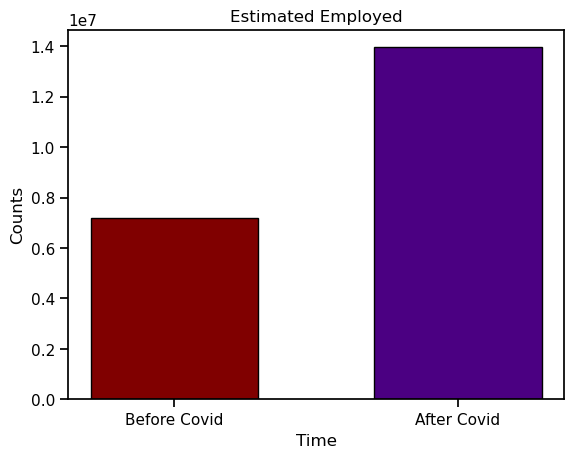

In [60]:
plt.bar(EE_df['Estimated Employed'].values, list(EE_df['Counts'].values),color = ['maroon', 'indigo'], edgecolor = 'black', width = 0.59)
plt.title("Estimated Employed")
plt.xlabel('Time')
plt.ylabel('Counts')
plt.show()

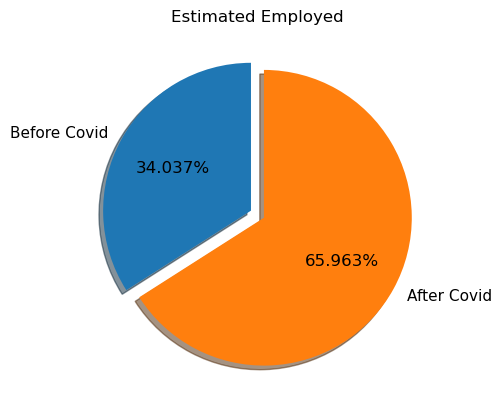

In [61]:
plt.title('Estimated Employed')
plt.pie(EE_df['Counts'].values, labels = EE_df['Estimated Employed'], autopct = '%0.3f%%', explode = [0.05, 0.05], startangle = 90, shadow = True)
plt.show() 

### Formation of Estimated Labour Participation Rate 

In [63]:
ELPR_dict = dict(zip(['Before Covid', 'After Covid'], [bfr_covid[2], afr_covid[2]]))
ELPR_dict

{'Before Covid': 42.630121621621626, 'After Covid': 41.68157303370787}

In [64]:
ELPR_df = pd.DataFrame(ELPR_dict.items(), columns = ['Estimated Labour Participation Rate', 'Percentages'])
ELPR_df

,Estimated Labour Participation Rate,Percentages
0,Before Covid,42.630122
1,After Covid,41.681573


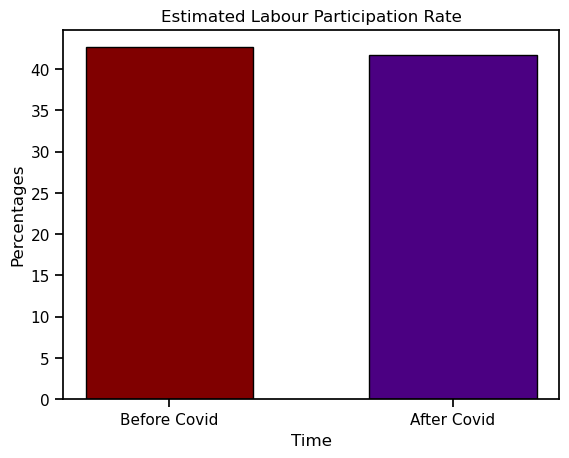

In [65]:
plt.bar(ELPR_df['Estimated Labour Participation Rate'].values, list(ELPR_df['Percentages'].values),color = ['maroon', 'indigo'], edgecolor = 'black', width = 0.59)
plt.title("Estimated Labour Participation Rate")
plt.xlabel('Time')
plt.ylabel('Percentages')
plt.show()

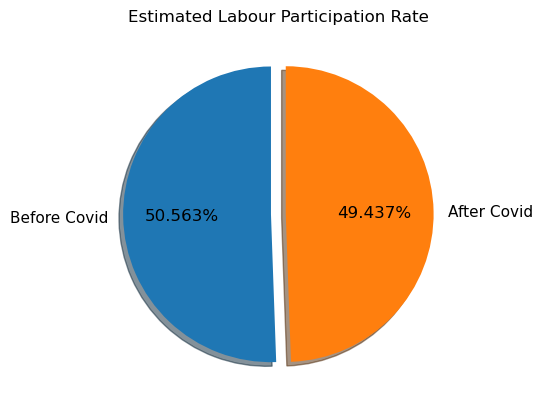

In [66]:
plt.title('Estimated Labour Participation Rate')
plt.pie(ELPR_df['Percentages'].values, labels = ELPR_df['Estimated Labour Participation Rate'], autopct = '%0.3f%%', explode = [0.05, 0.05], startangle = 90, shadow = True)
plt.show() 